# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [2]:
books = pd.read_csv("Books.csv")

In [3]:
users = pd.read_csv("Users.csv")

In [4]:
ratings = pd.read_csv("Ratings.csv")

In [5]:
books=books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']]

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# EDA

In [9]:
books.info()
users.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-M          271360 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 11497

In [10]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 6)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


In [11]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-M            0
dtype: int64

In [12]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
ratings.isnull().sum ()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


### We checked If perticular books have importance in future,(Ans-No) So we dropped nulls

In [15]:
books['Book-Author'][books['Book-Author'].isnull()].index

Int64Index([187689], dtype='int64')

In [16]:
books.dropna(inplace=True)

## BOOK YEAR & USER AGE has lots of illogical values so we can't rely on them
#### Year contains values such as 0, and published dates represent future dates.
#### Age has values such as 0-5 & more than 100 age catagories

In [17]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [18]:
users['Age'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

# Visualization

## The most active Age Group is in between 20-30s

<AxesSubplot:xlabel='Age', ylabel='Density'>

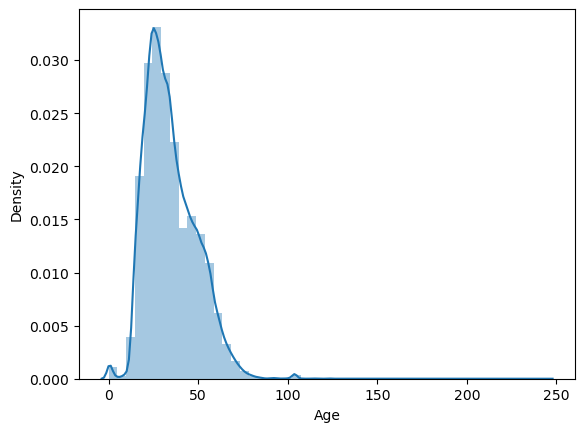

In [19]:
sns.distplot(users['Age'])

5841577
111915


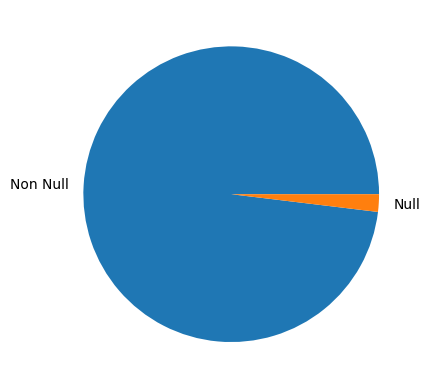

In [20]:
print (int(users['Age'].sum()))
print ((users['Age'].isnull().sum()) + ((users['Age']<11)&(users['Age']<100)).sum())
age_piechart= np.array([(5729662),111915])
labels=['Non Null','Null']
plt.pie(age_piechart,labels= labels)
plt.show()

In [21]:
# import random
# users['Age']fillna(random.randrange(18,32))
# same we can do for Year but Not priorirty right now

## Simplifying Location column

In [22]:
for i in users:
    users['country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [23]:
users['country']=users['country'].astype('str')

In [24]:
users.drop('Location',axis=1,inplace=True)

In [25]:
a=list(users.country.unique())
a=set(a)
a=list(a)
a=[x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [26]:
users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [27]:
users.head()

,User-ID,Age,country
0,1,NaN,usa
1,2,18.0,usa
2,3,NaN,russia
3,4,17.0,portugal
4,5,NaN,united kingdom


## Which country has the most no.of users

<AxesSubplot:>

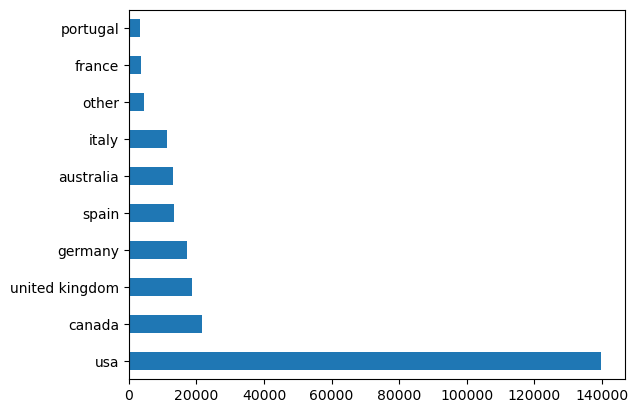

In [28]:
users['country'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')

## Which Author Published how many books

In [29]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-M'],
      dtype='object')

<AxesSubplot:>

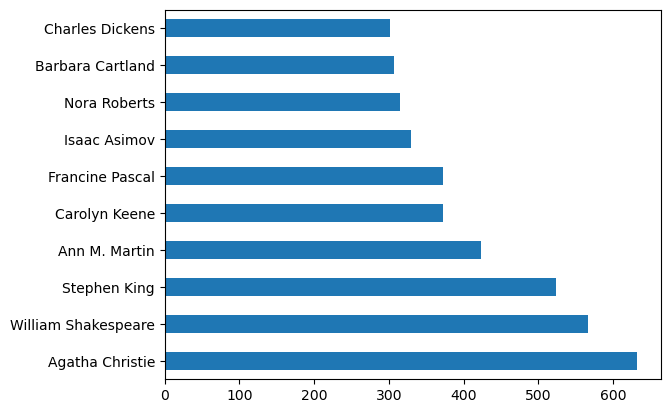

In [30]:
books['Book-Author'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')

# Ratings

In [31]:
ratings_by_user=ratings[ratings['User-ID'].isin(users['User-ID'])]

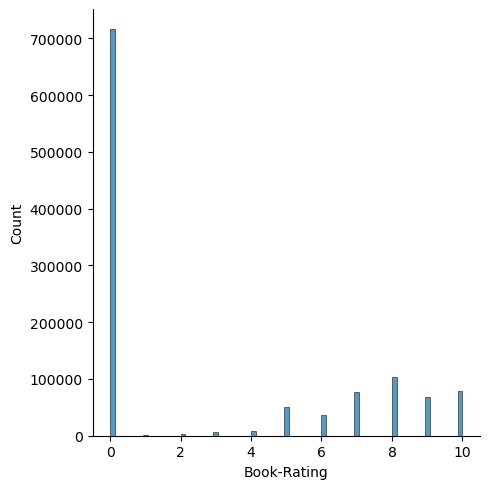

In [32]:
sns.displot(ratings_by_user['Book-Rating'])

## Around 7 Lakh Ratings are not available i.e. 0

In [33]:
ratings_updated=ratings_by_user[ratings_by_user['Book-Rating']!=0]

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

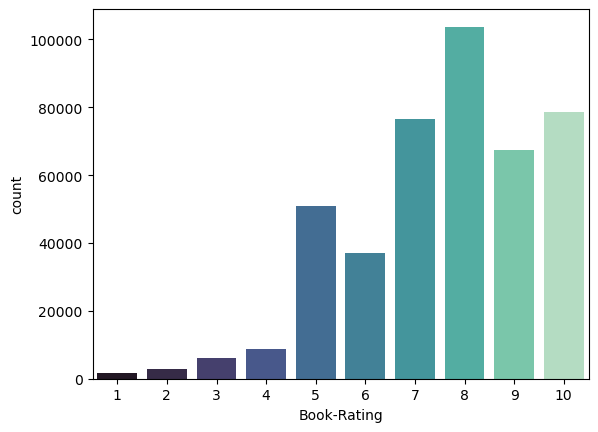

In [34]:
sns.countplot(data=ratings_updated,x='Book-Rating',palette='mako')

## 7 & 8 are most given ratings

=============================================================================================================

## Simplifying Column Names

In [35]:
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher','Image-URL-M':'url'},inplace=True)

In [36]:
users.rename(columns={'User-ID':'ID','Location':'location','Age':'age'},inplace=True)

In [37]:
ratings.rename(columns={'User-ID':'ID','Book-Rating':'rating'},inplace=True)

In [38]:
ratings.head()

,ID,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Merging Data

In [39]:
books_with_rating=ratings.merge(books ,on='ISBN')

In [40]:
books_with_rating.head()

,ID,ISBN,rating,title,author,year,publisher,url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...


In [41]:
books_with_rating.value_counts().sum()

1031133

In [42]:
most_rated_books=books_with_rating
most_rated_books=most_rated_books.groupby('title').count()['rating']

### Visualising on the basis of Rating

<AxesSubplot:ylabel='title'>

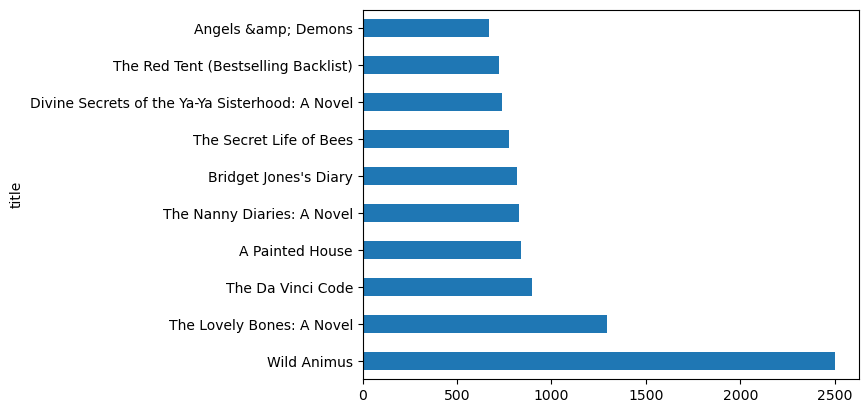

In [43]:
most_rated_books.sort_values(ascending=False)[:10].plot(kind='barh')

In [44]:
most_given_rating_byuser=books_with_rating
most_given_rating_byuser=most_given_rating_byuser.groupby('ID').count()['rating']

<AxesSubplot:ylabel='ID'>

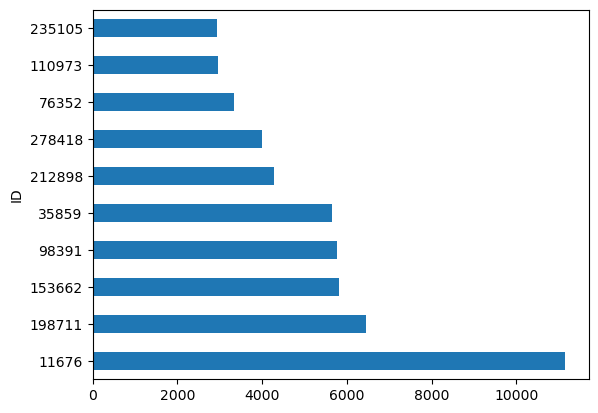

In [45]:
most_given_rating_byuser.sort_values(ascending=False)[:10].plot(kind='barh')

In [46]:
best_books=books_with_rating.groupby('title').mean()
best_books.rename(columns={'rating':'avg_rating'},inplace=True)
best_rated_books=best_books[best_books['avg_rating']>=6]
best_rated_books



,ID,avg_rating
title,,
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",269557.0,8.0
Dark Justice,98391.0,10.0
Highland Desire (Zebra Splendor Historical Romances),212965.0,7.0
Microsoft Application Architecture For Microsoft .net: Designing Application (Pro-Other),237883.0,9.0
Nonbook Materials: The Organization of Integrated Collections,171118.0,7.0
...,...,...
Ã?Â?ber mich selbst. Autobiographische Schriften.,148512.0,8.0
Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - 1965.,263733.0,10.0
Ã?Â?berfall auf hoher See.,124776.0,7.0


## Visualising top 30 most read books with there average ratings

In [47]:
merged_data = pd.merge(books, ratings, on='ISBN')
merged_data =  merged_data.sort_values('ISBN', ascending=True)

most_read = merged_data.title.value_counts().reset_index()
most_read.columns=['title','count']

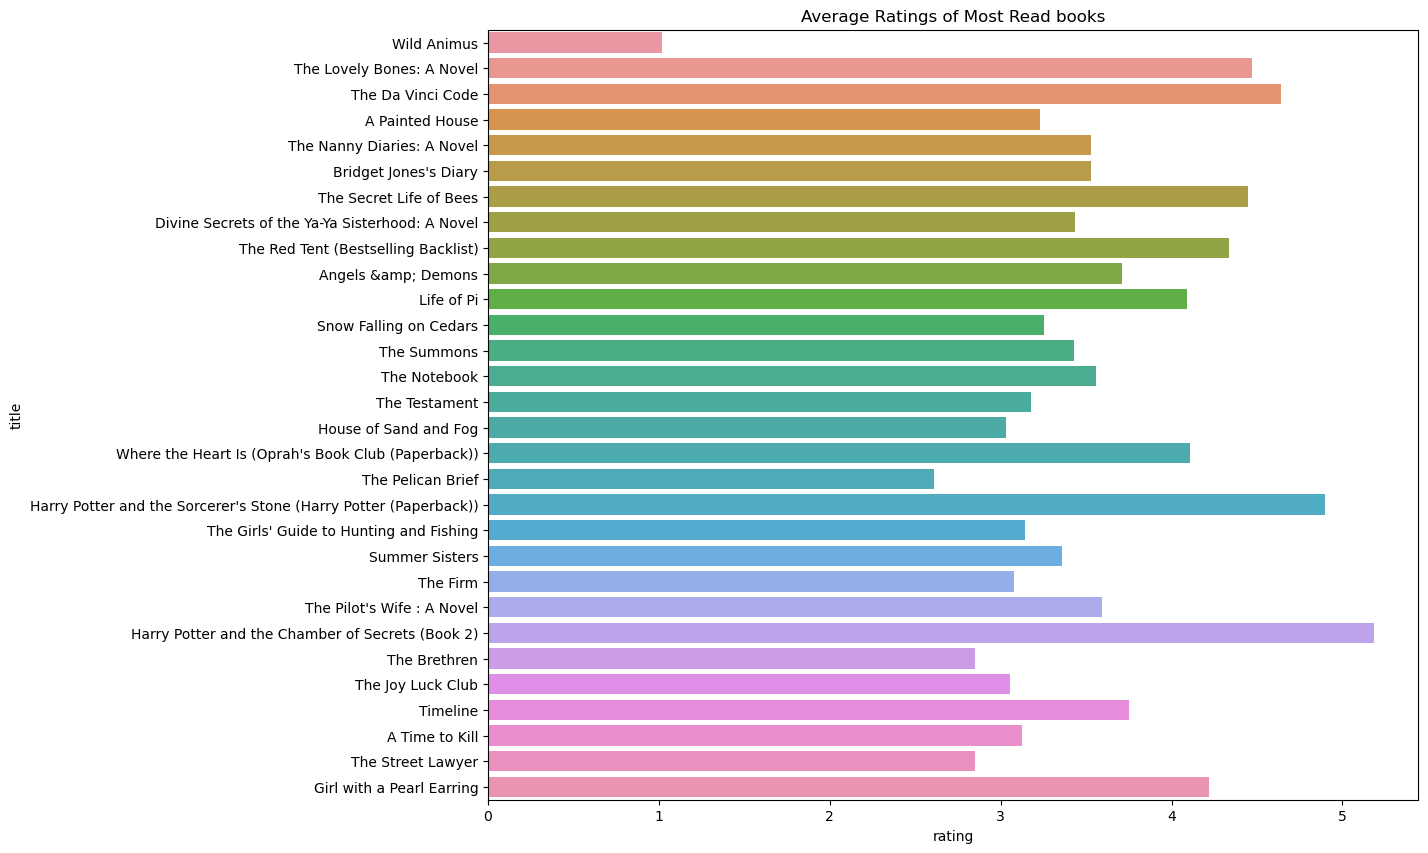

In [48]:
avg_data = merged_data.groupby('title', as_index=False)['rating'].mean()

most_rated_by_reads = pd.merge(avg_data,most_read,on='title')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'rating', y = 'title', data = most_rated_by_reads.head(30));


In [49]:
#books who has min. 6 avg ratings
best_rated_books

,ID,avg_rating
title,,
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",269557.0,8.0
Dark Justice,98391.0,10.0
Highland Desire (Zebra Splendor Historical Romances),212965.0,7.0
Microsoft Application Architecture For Microsoft .net: Designing Application (Pro-Other),237883.0,9.0
Nonbook Materials: The Organization of Integrated Collections,171118.0,7.0
...,...,...
Ã?Â?ber mich selbst. Autobiographische Schriften.,148512.0,8.0
Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - 1965.,263733.0,10.0
Ã?Â?berfall auf hoher See.,124776.0,7.0


In [50]:
best_books_with_users=pd.merge(best_rated_books,users,on='ID')
best_books_with_users

,ID,avg_rating,age,country
0,269557.0,8.00,40.0,usa
1,269557.0,8.00,40.0,usa
2,269557.0,8.00,40.0,usa
3,269557.0,10.00,40.0,usa
4,269557.0,10.00,40.0,usa
...,...,...,...,...
46035,185727.0,6.00,NaN,canada
46036,214464.0,10.00,NaN,other
46037,115271.0,7.25,22.0,germany
46038,84834.0,7.00,NaN,germany


<AxesSubplot:xlabel='age', ylabel='Density'>

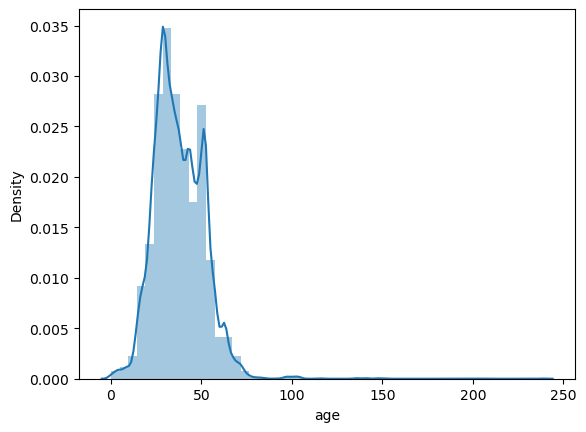

In [51]:
#best_books_agewise_distributuin
sns.distplot(best_books_with_users['age'])

<AxesSubplot:>

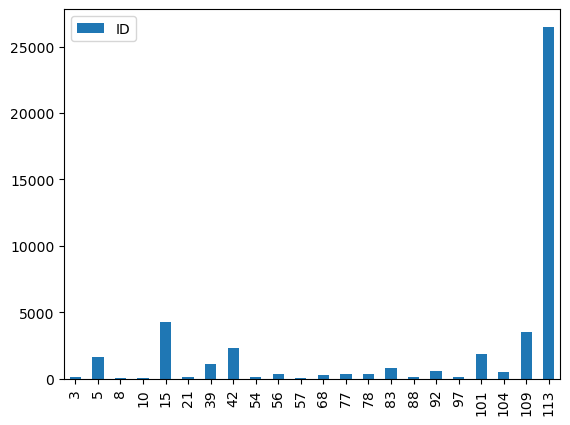

In [52]:
countrywise_number_of_best_books=best_books_with_users.groupby('country')['ID'].count().reset_index()
a=countrywise_number_of_best_books[countrywise_number_of_best_books['ID']>50]
a.plot(kind='bar')

## Popularity Based Recommender System

In [53]:
books_with_rating

,ID,ISBN,rating,title,author,year,publisher,url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1031128,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...
1031129,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...
1031130,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...
1031131,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...


In [54]:
num_rating_df = books_with_rating.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241064,Ã?Â?lpiraten.,2
241065,Ã?Â?rger mit Produkt X. Roman.,4
241066,Ã?Â?sterlich leben.,1
241067,Ã?Â?stlich der Berge.,3


In [55]:
avg_data.rename(columns={'rating':'avg_rating'},inplace=True)
avg_data

,title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241064,Ã?Â?lpiraten.,0.000000
241065,Ã?Â?rger mit Produkt X. Roman.,5.250000
241066,Ã?Â?sterlich leben.,7.000000
241067,Ã?Â?stlich der Berge.,2.666667


In [56]:
popular_df=num_rating_df.merge(avg_data,on='title')
popular_df

,title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241064,Ã?Â?lpiraten.,2,0.000000
241065,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241066,Ã?Â?sterlich leben.,1,7.000000
241067,Ã?Â?stlich der Berge.,3,2.666667


In [57]:
#lets define 50 popular books who gets above 250 ratings
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)


In [58]:
# different user_id for same book therefore we drop this duplicate data
popular_df = popular_df.merge(books,on='title').drop_duplicates('title')[['title','author','url','num_ratings','avg_rating']]


In [59]:
popular_df.shape

(50, 5)

## Collaborative Filtering Based Recommender System

In [61]:
x=books_with_rating.groupby('ID').count()['rating']>200
rating_of_users=x[x].index

In [64]:
x = books_with_rating.groupby('ID').count()['rating']>200
x

ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: rating, Length: 92106, dtype: bool

In [63]:
x[x].index

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='ID', length=811)

In [65]:
filtered_rating=books_with_rating[books_with_rating['ID'].isin(rating_of_users)]

In [66]:
filtered_rating

,ID,ISBN,rating,title,author,year,publisher,url
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...
1030880,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...
1030881,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...
1030882,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...
1030883,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...


In [67]:
y = filtered_rating.groupby('title').count()['rating']>=50
best_books = y[y].index
best_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=706)

In [68]:
final_ratings = filtered_rating[filtered_rating['title'].isin(best_books)]


In [69]:
pt = final_ratings.pivot_table(index='title',columns='ID',values='rating')
pt

ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [70]:
pt.fillna(0,inplace=True)
pt

ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
similarity_scores = cosine_similarity(pt)

In [73]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [68]:
similarity_scores.shape

(706, 706)

In [85]:
book_name = '1984'
# book_name='1st to Die: A Novel'

In [86]:
np.where(pt.index==book_name)

(array([0], dtype=int64),)

In [88]:
index = np.where(pt.index==book_name)[0][0]
index

0

In [ ]:
similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

In [92]:
similarity_scores[index]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [91]:
for i in enumerate(similarity_scores[index]):
    print(i)

(0, 0.9999999999999999)
(1, 0.10255024829874465)
(2, 0.012208555646509366)
(3, 0.0)
(4, 0.053672244225442485)
(5, 0.027749013024662858)
(6, 0.08216491130000354)
(7, 0.13732869060263378)
(8, 0.03261686350494277)
(9, 0.03667590746512177)
(10, 0.02322418425912186)
(11, 0.06766486753662343)
(12, 0.020839782065795794)
(13, 0.09673734976610586)
(14, 0.13388864701187034)
(15, 0.08303111691811028)
(16, 0.1115354275858341)
(17, 0.05100410510067514)
(18, 0.025177841632809915)
(19, 0.11706383185253948)
(20, 0.0)
(21, 0.14333792815336935)
(22, 0.07847534327232125)
(23, 0.06150451339525138)
(24, 0.08723968326958673)
(25, 0.0)
(26, 0.07009814362931202)
(27, 0.13658680855472938)
(28, 0.07600327535501016)
(29, 0.12167133598776536)
(30, 0.007680459111722776)
(31, 0.01473221255132234)
(32, 0.0)
(33, 0.07965814289647455)
(34, 0.04522616573040869)
(35, 0.01556270914112474)
(36, 0.09495937740802214)
(37, 0.018230696811058135)
(38, 0.026104653172312028)
(39, 0.07984012108659384)
(40, 0.11679968613719667)
(4

In [ ]:
data = []

for i in similar_items:
    item = []
    temp_df = books[books['title'] == pt.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('title')['title'].values))
    item.extend(list(temp_df.drop_duplicates('title')['author'].values))
    item.extend(list(temp_df.drop_duplicates('title')['url'].values))
    data.append(item)

In [69]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['url'].values))
        
        data.append(item)
    
    return data

In [70]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [72]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [74]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))